![PIC UPV PERTE Chip Chair Logo](https://www.pic-chair.upv.es/wp-content/uploads/2024/05/logo-upv-horizontal.png)
![PIC UPV PERTE Chip Chair Logo](https://www.pic-chair.upv.es/wp-content/uploads/2024/06/logos-perte-chip-1024x119.png)


# Laboratory 0.1. ModeSolver

Welcome to our Design Laboratory! Throughout the course, we will be using a Python package called [GDSFactory](https://gdsfactory.github.io/gdsfactory/index.html), and is a great alternative to other commercial software like Synopsys Optodesigner, Luceda Photonics, or Lumerical/Interconnect. Since it runs on Python, you have two options for executing your laboratory tasks:

1. **Local installation on your own PC** (Recommended): Please note that we will not spend class time on installing the software. However, feel free to reach out if you need help with the installation.

2. **Cloud Workspace**: Alternatively, you can use a cloud-based solution if the Local installation does not work.

## 0. Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tidy3d as td

import gplugins as gp
import gplugins.tidy3d as gt
from gplugins import plot
from gplugins.common.config import PATH

nm = 1e-3
wavelength = np.linspace(1500, 1600,11) * nm
f = td.C_0 / wavelength

#set a change

## LO.1. Effective index of a waveguide

### 1.1. Materials

We need the refractive index of each material in the cross-section. There are different options to get this information, such as [RefractiveIndex.info](https://refractiveindex.info/) and the [Material Library from Tidy3D](https://docs.flexcompute.com/projects/tidy3d/en/v2.6.0/api/material_library.html#). Here we will load and check the characteristics from the most common materials used in fabrication of photonic circuits.

#### 1.1.1. Crystalline Silicon 

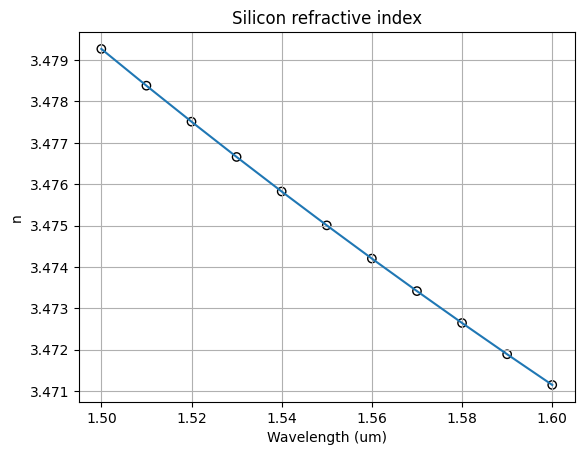

In [3]:
## Material model loaded
si_complex = td.material_library["cSi"]["Li1993_293K"].eps_model(f)
## Check the Tidy3D Docs for more information on the "Variant"

## Index at a particular wavelength
si_index , si_k = td.Medium.eps_complex_to_nk(si_complex)
plt.scatter(wavelength, si_index,edgecolors='k',facecolors='none')
plt.plot(wavelength,si_index)
plt.title("Silicon refractive index")
plt.xlabel("Wavelength (um)")
plt.ylabel("n")
plt.grid()

#### 1.1.2. Silicon Nitride

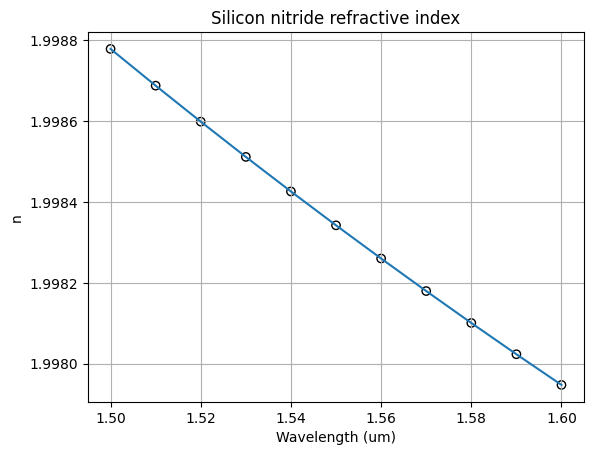

In [4]:
nitride_complex = td.material_library["Si3N4"]["Luke2015PMLStable"].eps_model(f)
nitride_index, nitride_k = td.Medium.eps_complex_to_nk(nitride_complex)
plt.scatter(wavelength,nitride_index,edgecolors='k',facecolors='none')
plt.plot(wavelength, nitride_index)
plt.title("Silicon nitride refractive index")
plt.xlabel("Wavelength (um)")
plt.ylabel("n")
plt.grid()


#### 1.1.3. Silicon Dioxide

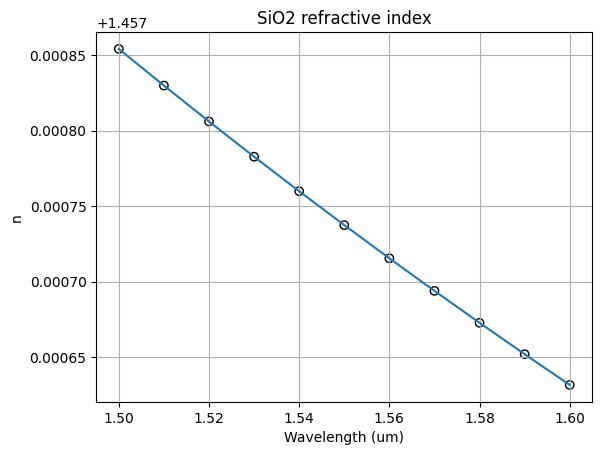

In [5]:
box_complex = td.material_library["SiO2"]["Horiba"].eps_model(f)
box_index, box_k = td.Medium.eps_complex_to_nk(box_complex)
plt.scatter(wavelength,box_index,edgecolors='k',facecolors='None')
plt.plot(wavelength, box_index)
plt.title("SiO2 refractive index")
plt.xlabel("Wavelength (um)")
plt.ylabel("n")
plt.grid()

### 1.2. Cross - Section Definition

In GDSFactory - Tidy3d modesolver we just have to use the [gt.modes.Waveguide()](https://gdsfactory.github.io/gplugins/_autosummary/gplugins.tidy3d.modes.Waveguide.html) function. It implements the deep (rib) and shallow (ridge) waveguides. 

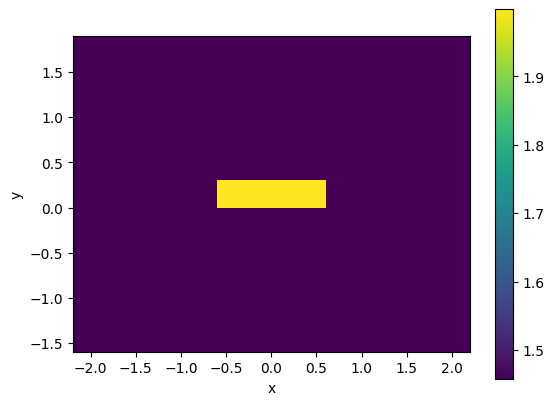

In [6]:
deep_waveguide = gt.modes.Waveguide(
    # Geometrical Parameters
    core_width=1.2, # Waveguide width
    core_thickness=300 * nm, # Waveguide height 
    slab_thickness=0 * nm, # For shallow waveguides - Set to 0 if its a deep-etched waveguide.
    # Materials
    core_material='sin', #  Material of the waveguide
    clad_material='sio2', # Surrounding material
    # Modesolver Parameters
    wavelength=1550 * nm, # Wavelength to simulate
    num_modes=4, # Targeted number of modes to find 
    max_grid_scaling=1.5, # Parameters of the grid
    grid_resolution=20, # Parameters of the grid
    cache_path='.cache/', # Important! In order to save simulation time, set your cache Path!
    precision='double',
)

deep_waveguide.plot_index()

### 1.3. Simulations

#### 1.3.1. Numerical results

We can find the effective index (n_eff), TE and TM fraction for each particular cross-section.

In [7]:
deep_waveguide.n_eff

/home/maria_romero/pic-upv-lab0-1/.venv/lib/python3.12/site-packages/tidy3d/components/mode/derivatives.py:14: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
  dxf = sp.csr_matrix(sp.diags([-1, 1], [0, 1], shape=(Nx, Nx)))
/home/maria_romero/pic-upv-lab0-1/.venv/lib/python3.12/site-packages/tidy3d/components/mode/derivatives.py:27: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
  dxb = sp.csr_matrix(sp.diags([1, -1], [0, -1], shape=(Nx, Nx)))
/home/maria_romero/pic-upv-lab0-1/.venv/lib/python3.12/site-packages/tidy3d

16:49:50 CET WARNING: Mode field at frequency index 0, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 0, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: The group index was not computed. To calculate group      
             index, pass 'group_index_step = True' in the 'ModeSpec'.           

2026-02-09 16:49:50.900 | INFO     | gplugins.tidy3d.modes:_data:306 - store data into .cache/Waveguide_cf92515ae4232c65.npz.


array([1.60524792+0.00010066j, 1.52829803+0.00017753j,
       1.45072999+0.00019228j, 1.43325817+0.00021838j])

In [8]:
deep_waveguide.fraction_te

array([0.99505426, 0.01004259, 0.96264794, 0.047651  ])

In [9]:
deep_waveguide.fraction_tm

array([0.00494574, 0.98995741, 0.03735206, 0.952349  ])

#### 1.3.4. Plots

Text(0.5, 1.0, 'Titulo')

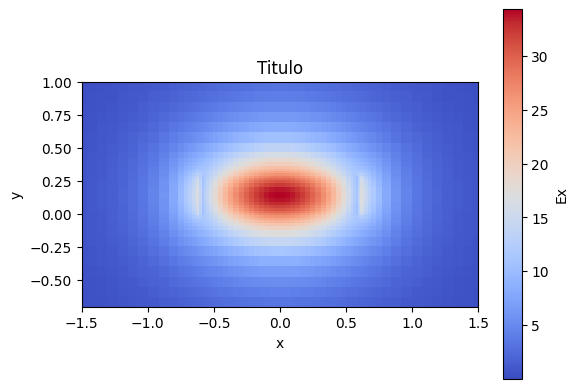

In [10]:
deep_waveguide.plot_field(mode_index=0 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                            cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)
) # 
plt.title('Titulo') # You might need this later :) 

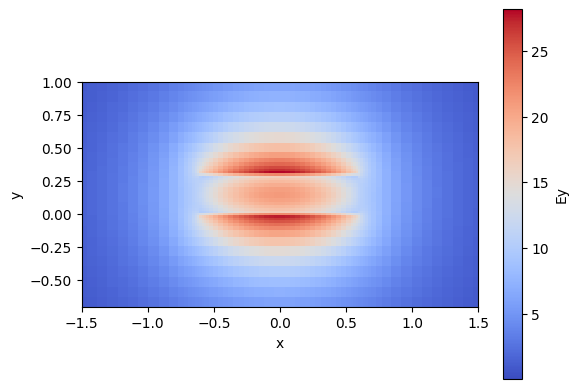

In [11]:
deep_waveguide.plot_field(mode_index=1 , # Mode to be plotted
                          field_name='Ey', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

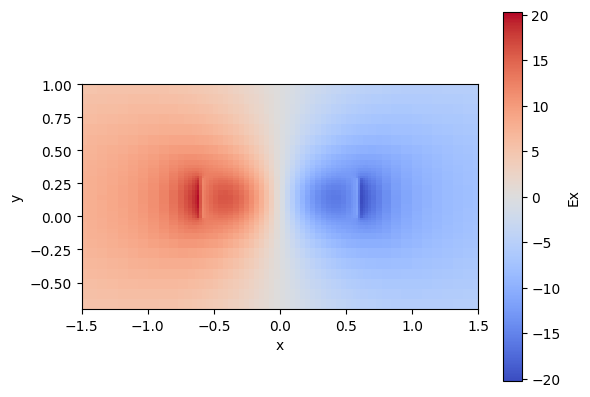

In [12]:
deep_waveguide.plot_field(mode_index=2 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

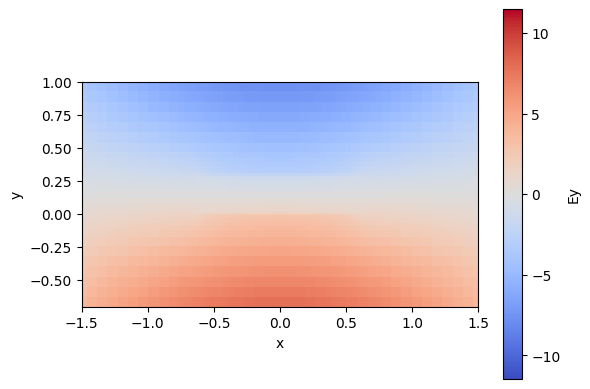

In [13]:
deep_waveguide.plot_field(mode_index=3, # Mode to be plotted
                          field_name='Ey', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

**Important** 
These results are derived from a numerical method used to solve the EM problem, so they must always be interpreted carefully to assess their accuracy. You must check, for instance, if the value of each index neff is higher than the refractive index of the cladding. 

## LO.2. Wavelength behavior

2026-02-09 17:26:07.385 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_cf0af488213d9e23.npz.
[0.99696815 0.70636116 0.17526176 0.99999339]
[3.03185218e-03 2.93638837e-01 8.24738243e-01 6.61406913e-06]


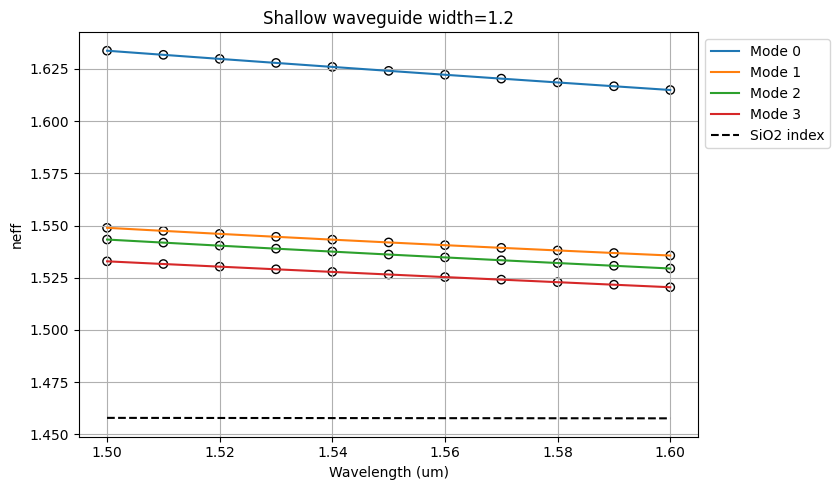

In [18]:
# The wavelength could be a vector also
wavelength = np.linspace(1.5, 1.6, 11)  # Student code here. Tip np.linspace()

deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength, 
    core_width=1.2, 
    slab_thickness= 150 * nm,
    core_material='sin',
    clad_material='sio2',
    core_thickness=300 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)

res_neff = deep_waveguide.n_eff # In this case, the result is not just a number, is a wavelength-dependent vector
res_te = deep_waveguide.fraction_te # Wavelength-dependent vector
res_tm =deep_waveguide.fraction_tm # Wavelength-dependent vector

plt.figure(figsize=(10, 5))
for k in range(res_neff.shape[1]):
    # It's necessary to 'access' each element on the array
    plt.scatter(wavelength, res_neff[:,k].real,edgecolors='k',facecolors='none',label = '__nolegend__')
    plt.plot(wavelength, res_neff[:,k].real,label=f'Mode {k}')
plt.title(f"Shallow waveguide width={1.2}")
plt.xlabel("Wavelength (um)")
plt.ylabel("neff")
plt.grid()
plt.plot(wavelength, box_index,'k--', label='SiO2 index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])

print(res_te)
print(res_tm)

2026-02-09 17:27:09.046 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_e70065e5b5dc42c3.npz.
[0.99497538 0.00955331 0.96332528 0.05009011]
[0.00502462 0.99044669 0.03667472 0.94990989]


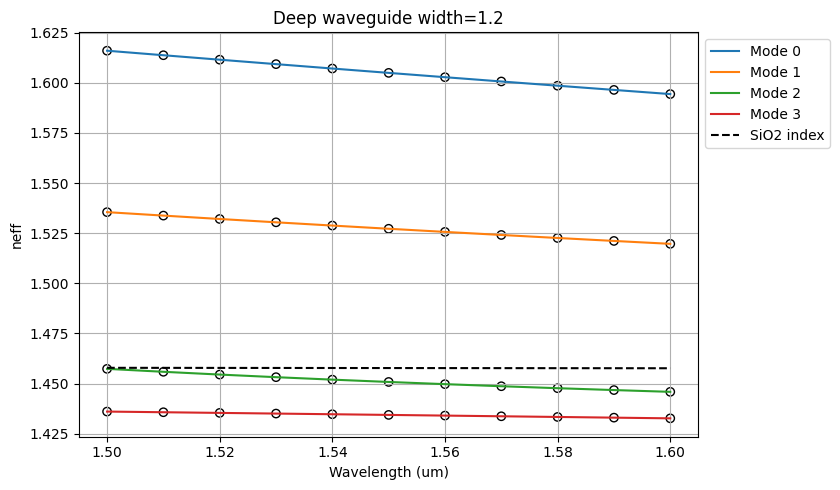

In [19]:
# The wavelength could be a vector also
wavelength = np.linspace(1.5, 1.6, 11)  # Student code here. Tip np.linspace()

deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength, 
    core_width=1.2, 
    slab_thickness= 0,
    core_material='sin',
    clad_material='sio2',
    core_thickness=300 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)

res_neff = deep_waveguide.n_eff # In this case, the result is not just a number, is a wavelength-dependent vector
res_te = deep_waveguide.fraction_te # Wavelength-dependent vector
res_tm =deep_waveguide.fraction_tm # Wavelength-dependent vector

plt.figure(figsize=(10, 5))
for k in range(res_neff.shape[1]):
    # It's necessary to 'access' each element on the array
    plt.scatter(wavelength, res_neff[:,k].real,edgecolors='k',facecolors='none',label = '__nolegend__')
    plt.plot(wavelength, res_neff[:,k].real,label=f'Mode {k}')
plt.title(f"Deep waveguide width={1.2}")
plt.xlabel("Wavelength (um)")
plt.ylabel("neff")
plt.grid()
plt.plot(wavelength, box_index,'k--', label='SiO2 index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])

print(res_te)
print(res_tm)